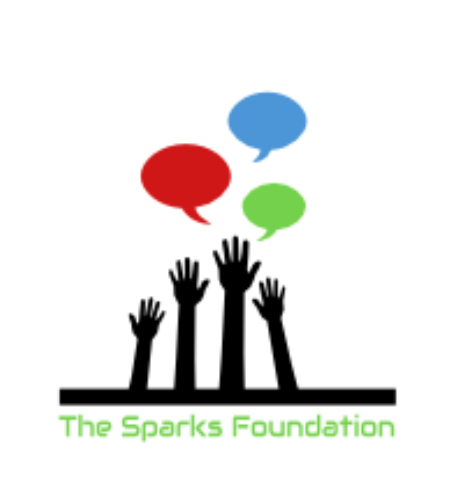

# Data Science and Business Analytics Internship

# Task 2 - Prediction using Unsupervised ML

# Intern - Jignesh Manocha

In [1]:
#Required Libraries for importing the data
import pandas as pd

#Required package for silouette score visualization
!pip install yellowbrick

#Required Libraries for data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

#Required Libraries for data preprocessing
from sklearn.preprocessing import MinMaxScaler

#Required Libraries to compute optimal k value
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Required Libraries for training and testing the data using Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Required Libraries for Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Importing the data

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#checking the data shape
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#checking the unique values in the data
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [7]:
#dropping the Id as it doesn't predict anything
df.drop(['Id'], axis = 1, inplace = True)

In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#checking data type
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
#dividing categorical and numerical features
categorical_features = ['Species']
continuous_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [11]:
#converting the categorical feature into dummy features
for col in categorical_features:
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)


In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


# Data Preprocessing

In [13]:
#data preprocessing using minimax scaler method
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)

# Computing optimal value of k using elbow method

In [14]:
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\abc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


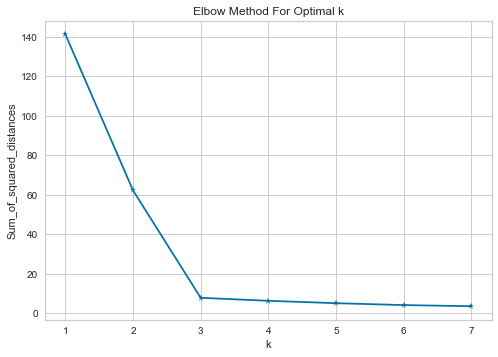

In [15]:
#visualizing the optimal value
plt.plot(K, Sum_of_squared_distances, 'bx-', marker = '*')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Note- From the graph above it is cleared that elbow bends when k = 3, which means, that is the optimal number of clusters for this problem.

# Computing optimal value of k using Silhouette coefficient method

In [16]:
# Create range of clusters 
range_n_clusters = list(range(2,9))
print(range_n_clusters)

# Loop through clusters
for n_clusters in range_n_clusters:
   
    clusterer = KMeans(n_clusters=n_clusters).fit(data_transformed)
    preds = clusterer.predict(data_transformed)
    centers = clusterer.cluster_centers_
    score = silhouette_score(data_transformed, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {})".format(n_clusters, score))
    
    

[2, 3, 4, 5, 6, 7, 8]
For n_clusters = 2. The average silhouette_score is : 0.5988612190229297)
For n_clusters = 3. The average silhouette_score is : 0.8131378567546473)
For n_clusters = 4. The average silhouette_score is : 0.6708935682123922)
For n_clusters = 5. The average silhouette_score is : 0.5281203266089715)
For n_clusters = 6. The average silhouette_score is : 0.37980698355913706)
For n_clusters = 7. The average silhouette_score is : 0.3713718372775901)
For n_clusters = 8. The average silhouette_score is : 0.3498818700771387)


Note - According to the Silhouette method, the average silhouette score is high when k = 3, which is now proved that the optimal number of clusters for this problem are 3.

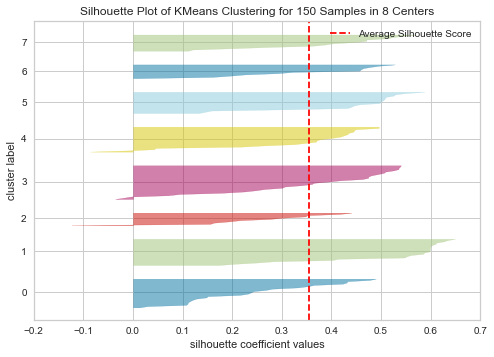

In [17]:
#visualizing average silhouette score
model = KMeans(n_clusters=n_clusters)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data_transformed)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Cluster Visualization

In [18]:
clusterer = KMeans(n_clusters=3).fit(data_transformed)
preds = clusterer.predict(data_transformed)
centres = clusterer.cluster_centers_

<function matplotlib.pyplot.legend(*args, **kwargs)>

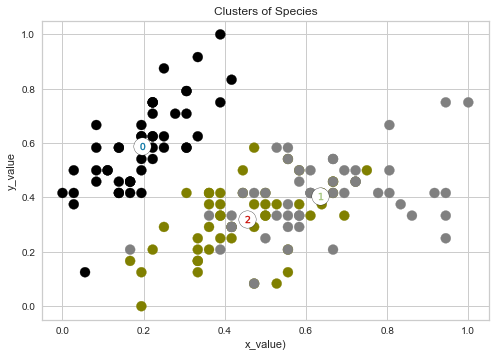

In [19]:
colors = ['black','gray', 'olive']
colored = [colors[k] for k in preds]
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], s=100, color = colored)
for i, c in enumerate(centres):
    plt.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', marker = 'o', s=300);
    plt.scatter(x = c[0], y = c[1], marker='${}$'.format(i), alpha = 1, s=50)
plt.title('Clusters of Species')
plt.xlabel('x_value)')
plt.ylabel('y_value')
plt.legend

# Thank You!